In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

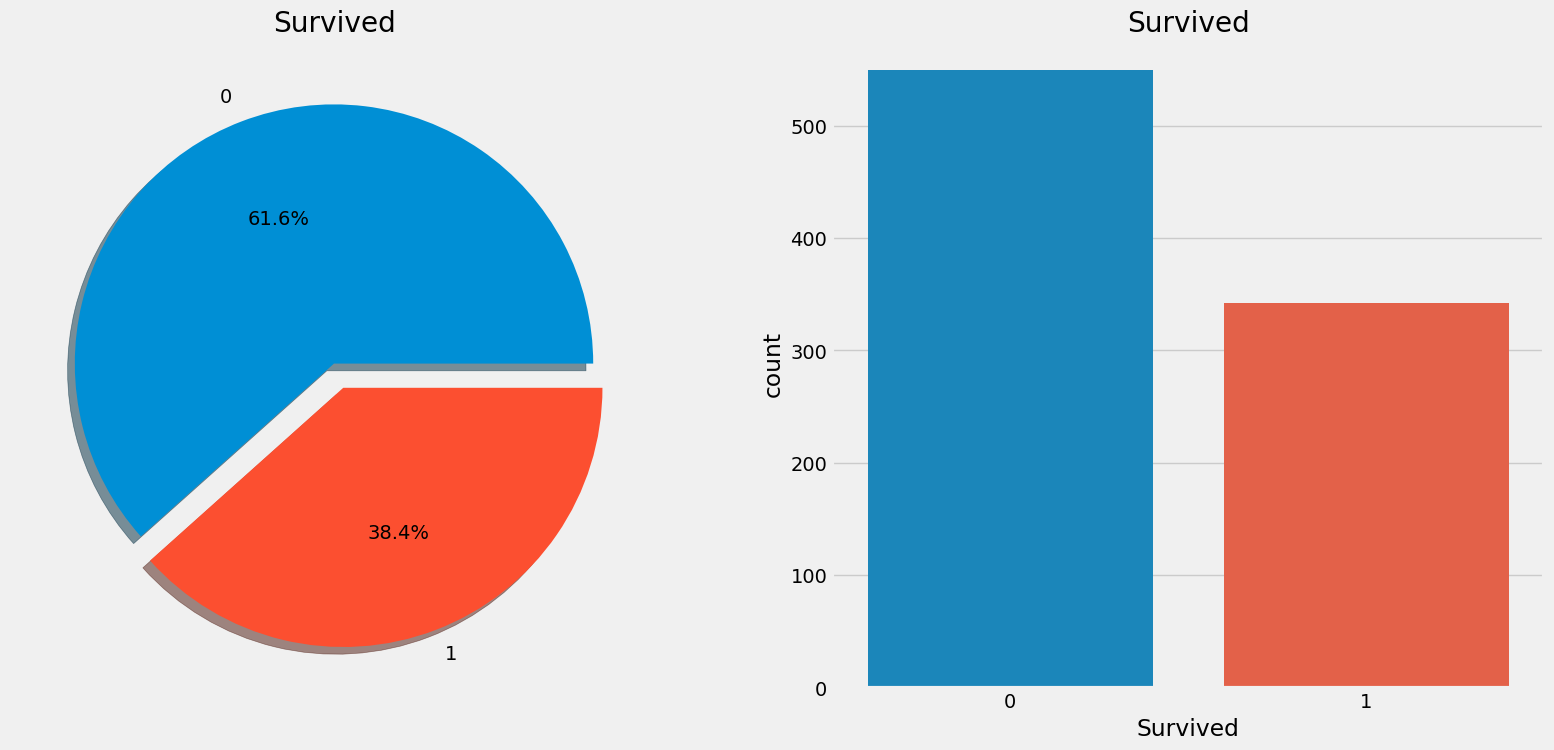

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].value_counts()


Sex     Survived  Survived
female  0         0            81
        1         1           233
male    0         0           468
        1         1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived vs Sex')

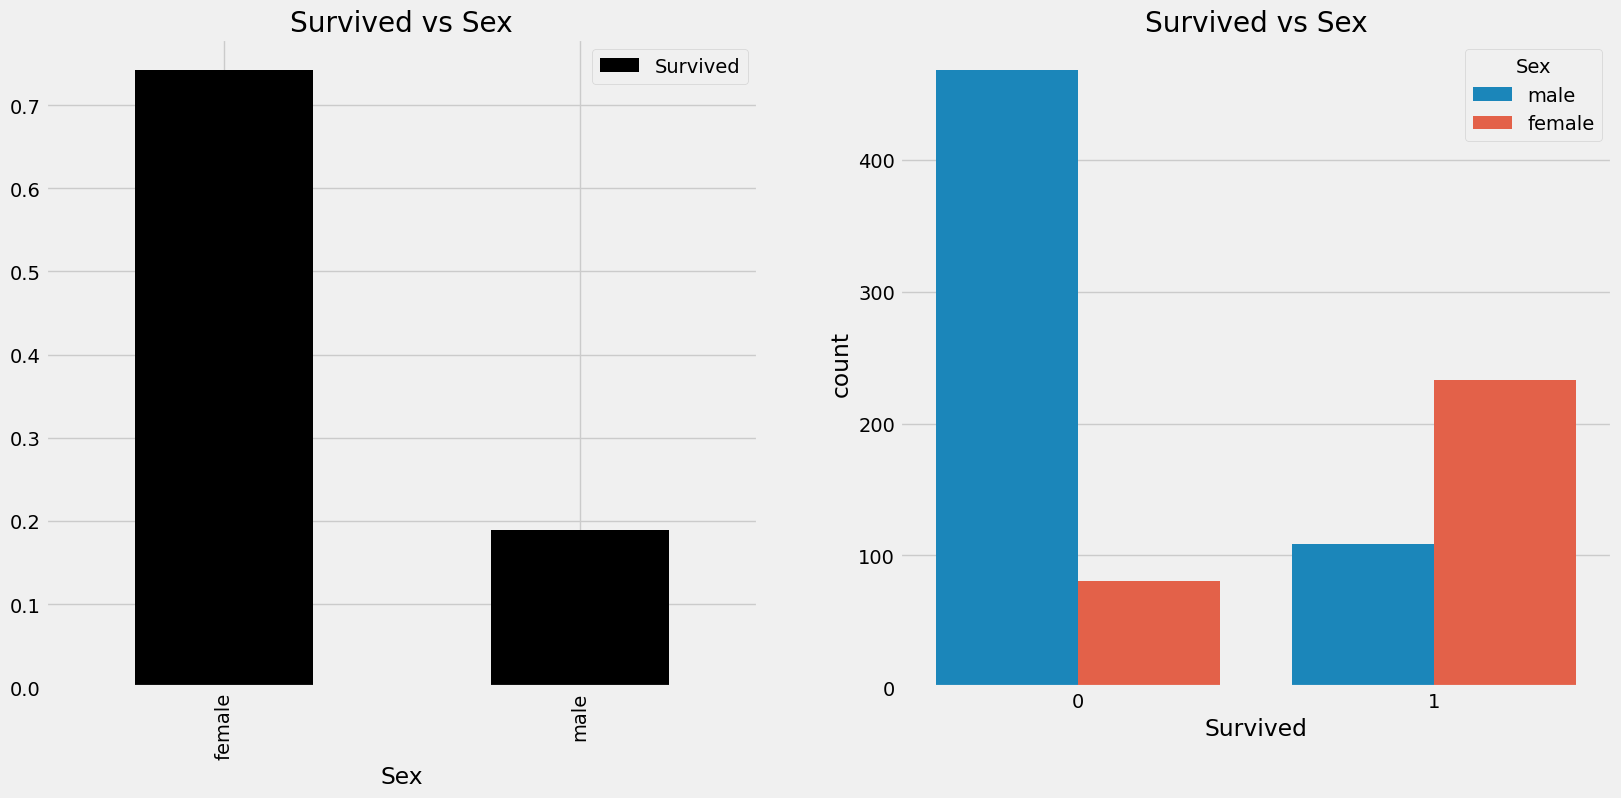

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Survived', 'Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0],color='black')
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Survived', hue='Sex', ax=ax[1])
ax[1].set_title('Survived vs Sex')

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Survived vs Pclass')

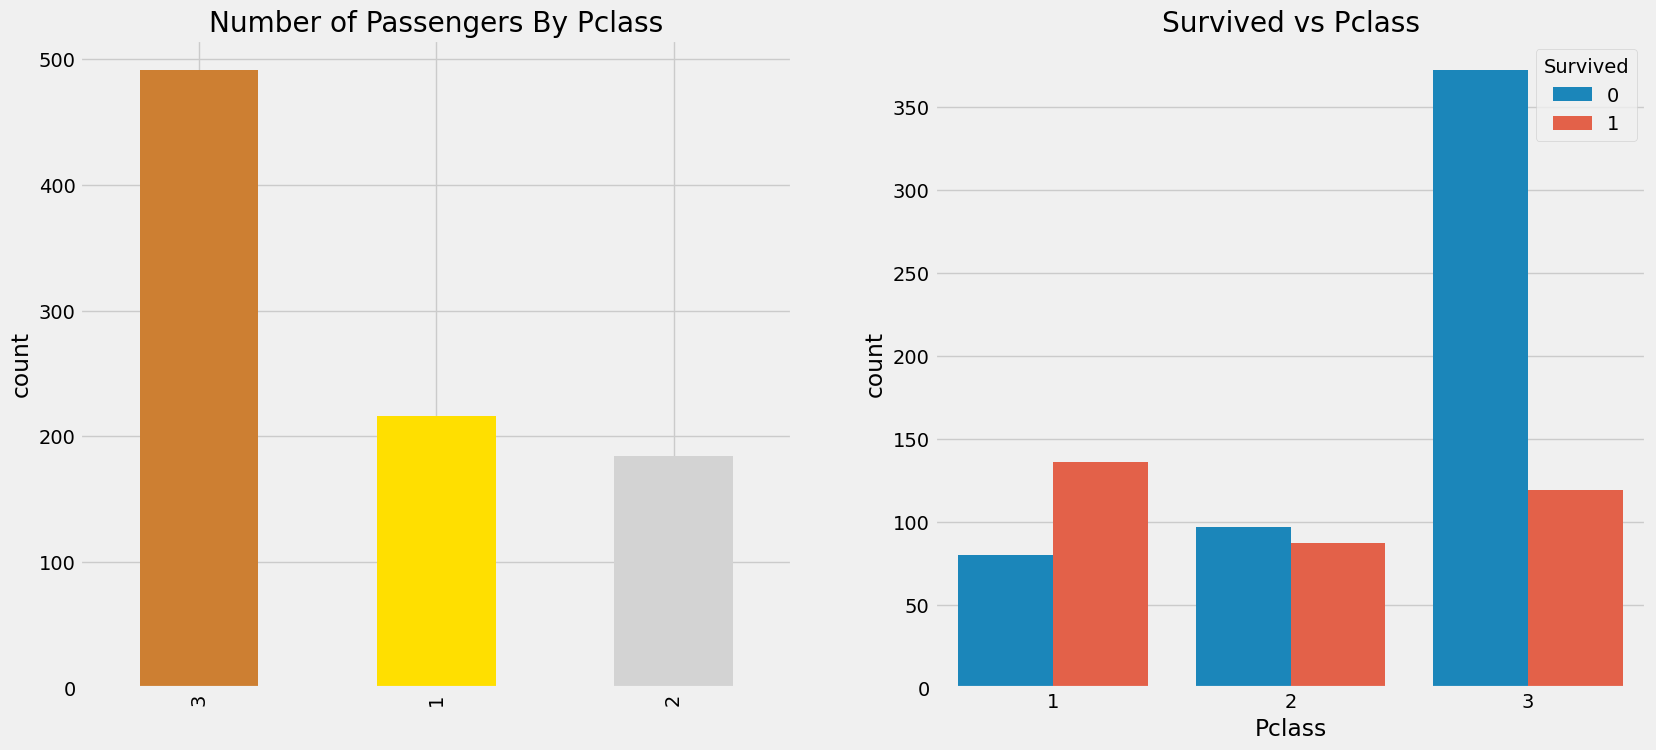

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('count')
sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Survived vs Pclass')

<Axes: xlabel='Pclass'>

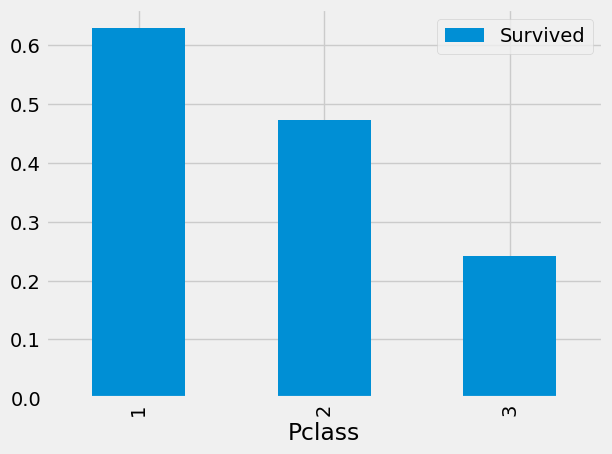

In [10]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()

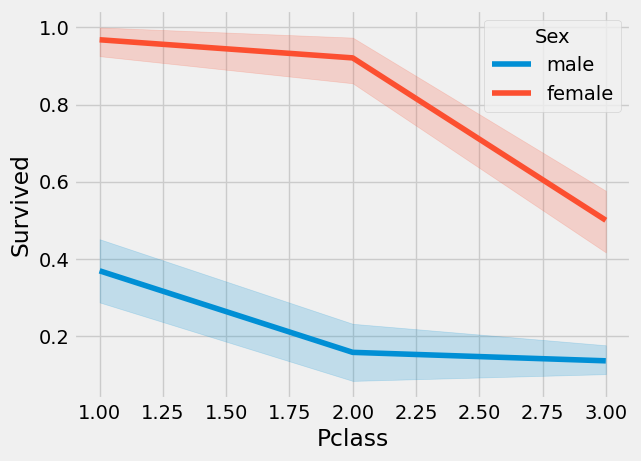

In [11]:
sns.lineplot(data=data, x='Pclass', y='Survived', hue='Sex')
plt.show()

In [12]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

In [13]:
print("Oldest Passenger was of : ", data['Age'].max(), 'Years' )
print("Youngest Passenger was of : ", data['Age'].min(), 'Years')
print("Average Age on the ship : ", data['Age'].mean(), 'Years')

Oldest Passenger was of :  80.0 Years
Youngest Passenger was of :  0.42 Years
Average Age on the ship :  29.69911764705882 Years


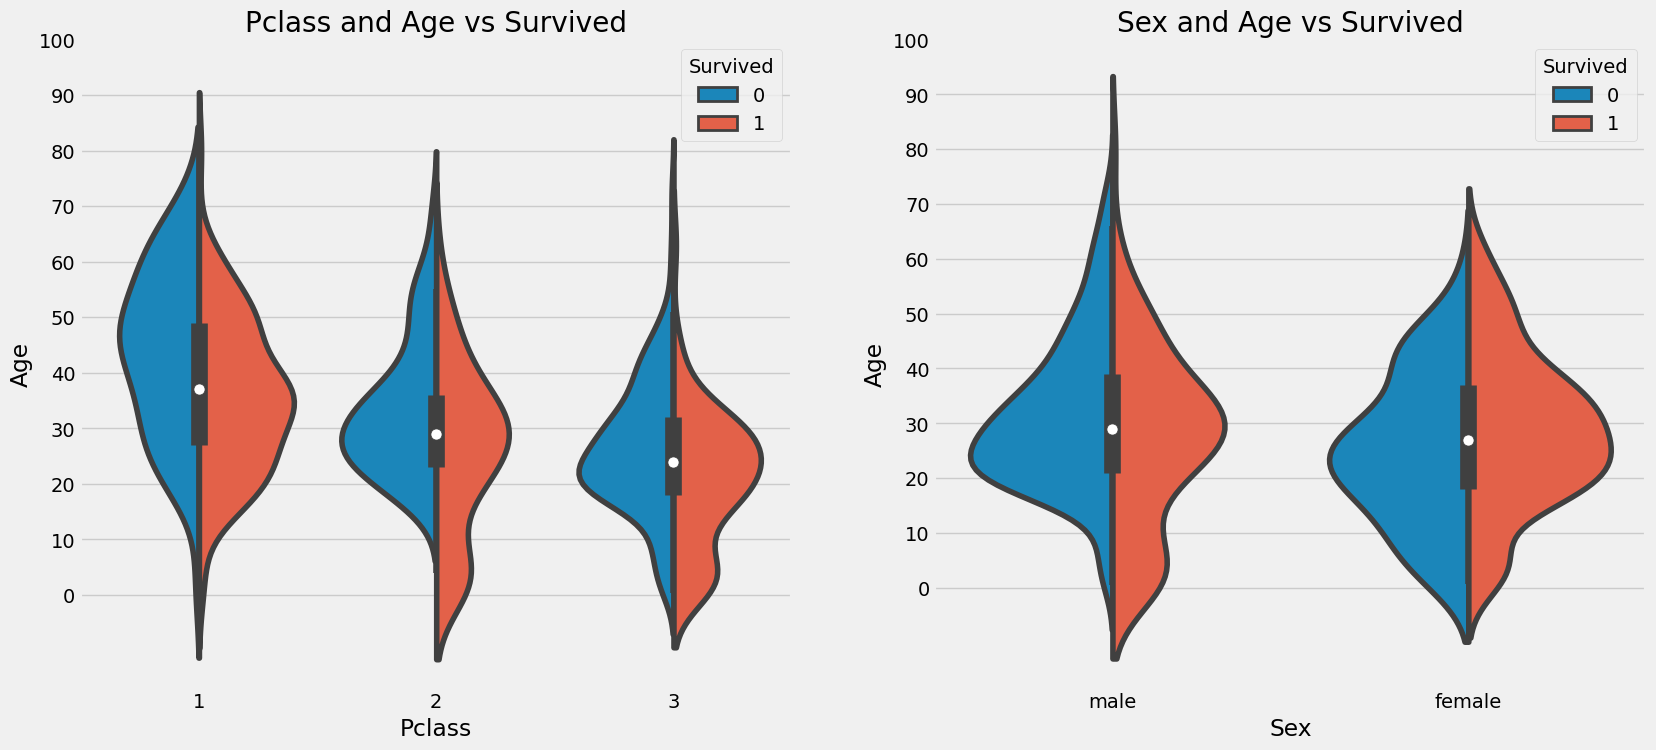

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
# [A-Za-z]+).의 의미는 뒤에 .가 있고 A-Z와 a-z 사이에 있는 문자열을 찾아준다.

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[data.Age.isnull() & (data.Initial=='Master'), 'Age'] = 5
data.loc[data.Age.isnull() & (data.Initial=='Miss'), 'Age'] = 22
data.loc[data.Age.isnull() & data.Initial=='Other', 'Age'] = 46

In [20]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Initial        False
dtype: bool

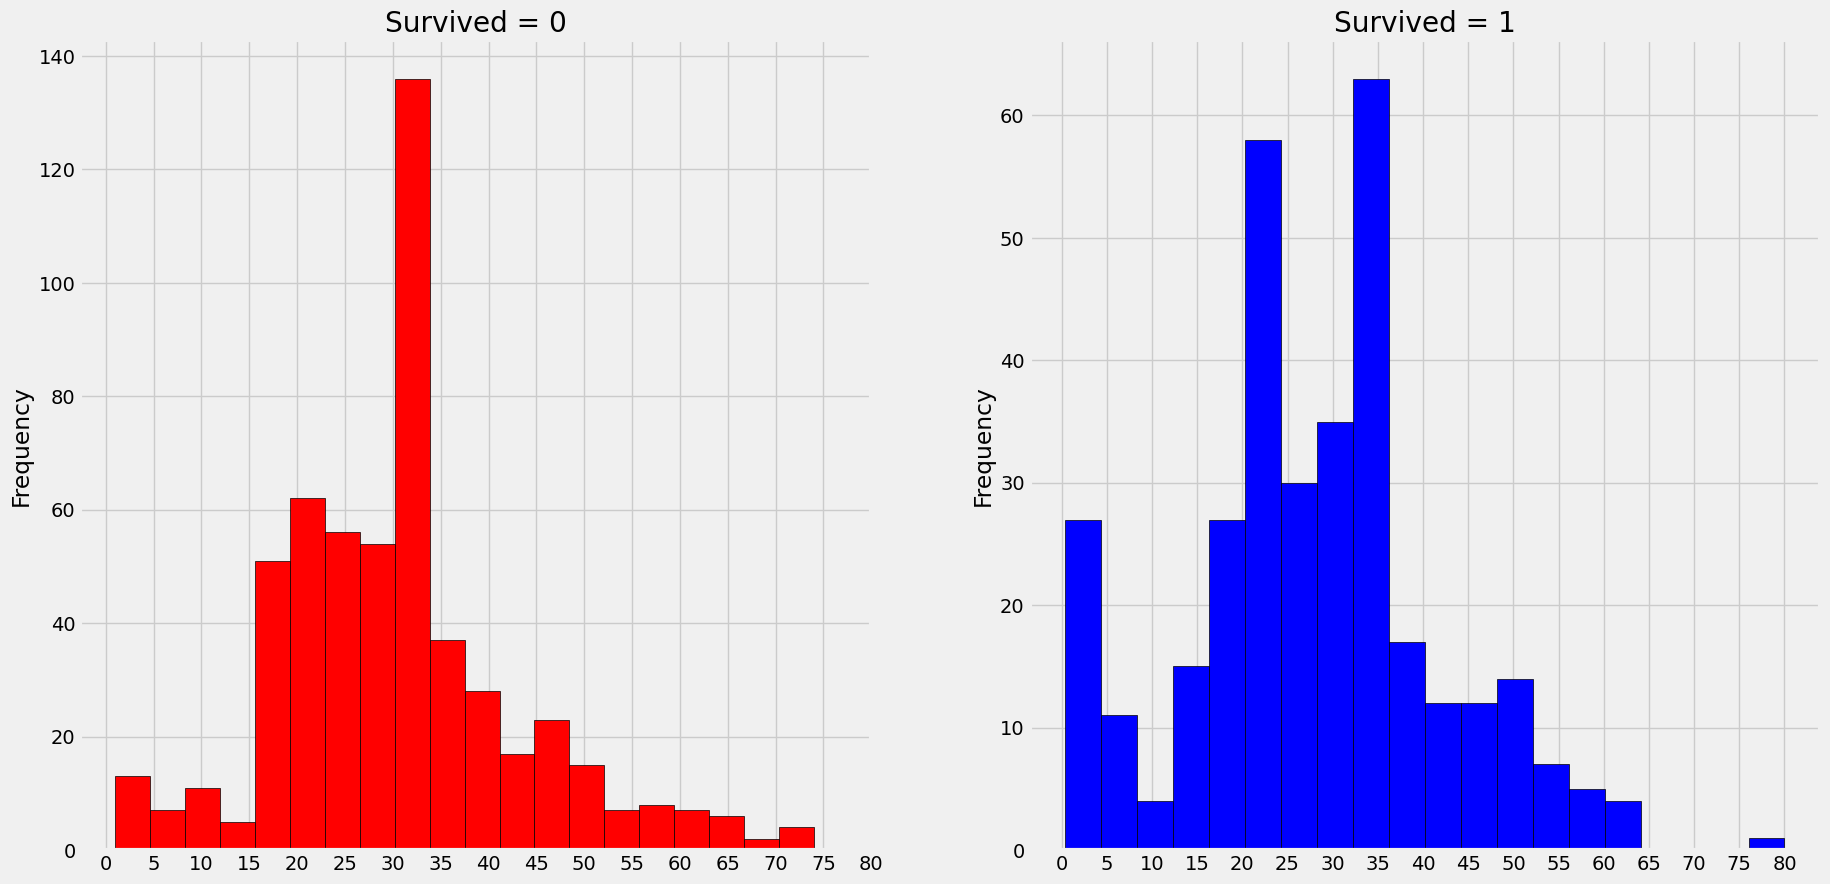

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='blue')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()

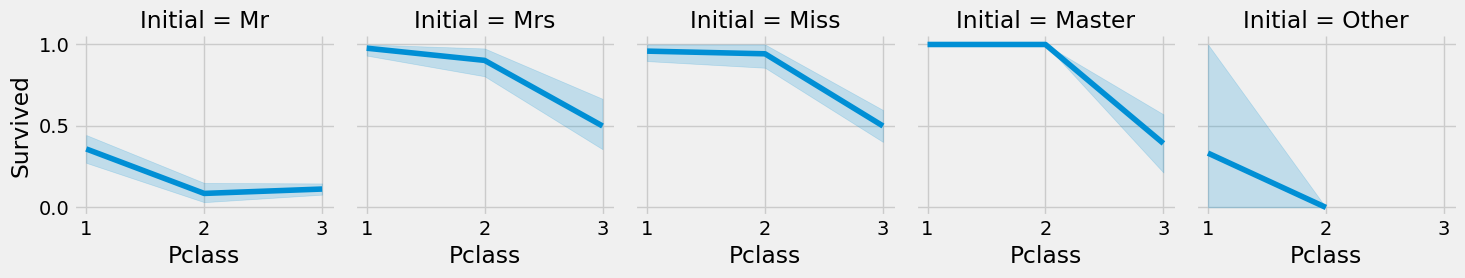

In [22]:
facet = sns.FacetGrid(data, col='Initial', aspect=1)
facet = facet.map(sns.lineplot, 'Pclass', 'Survived')

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

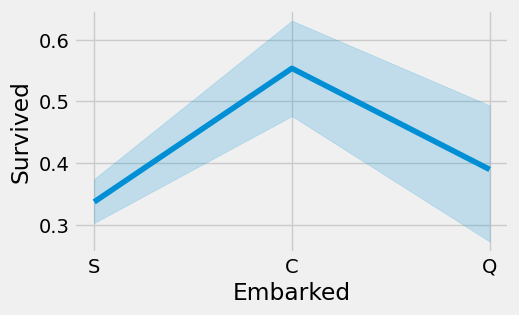

In [24]:
sns.lineplot(data=data, x='Embarked', y='Survived')
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

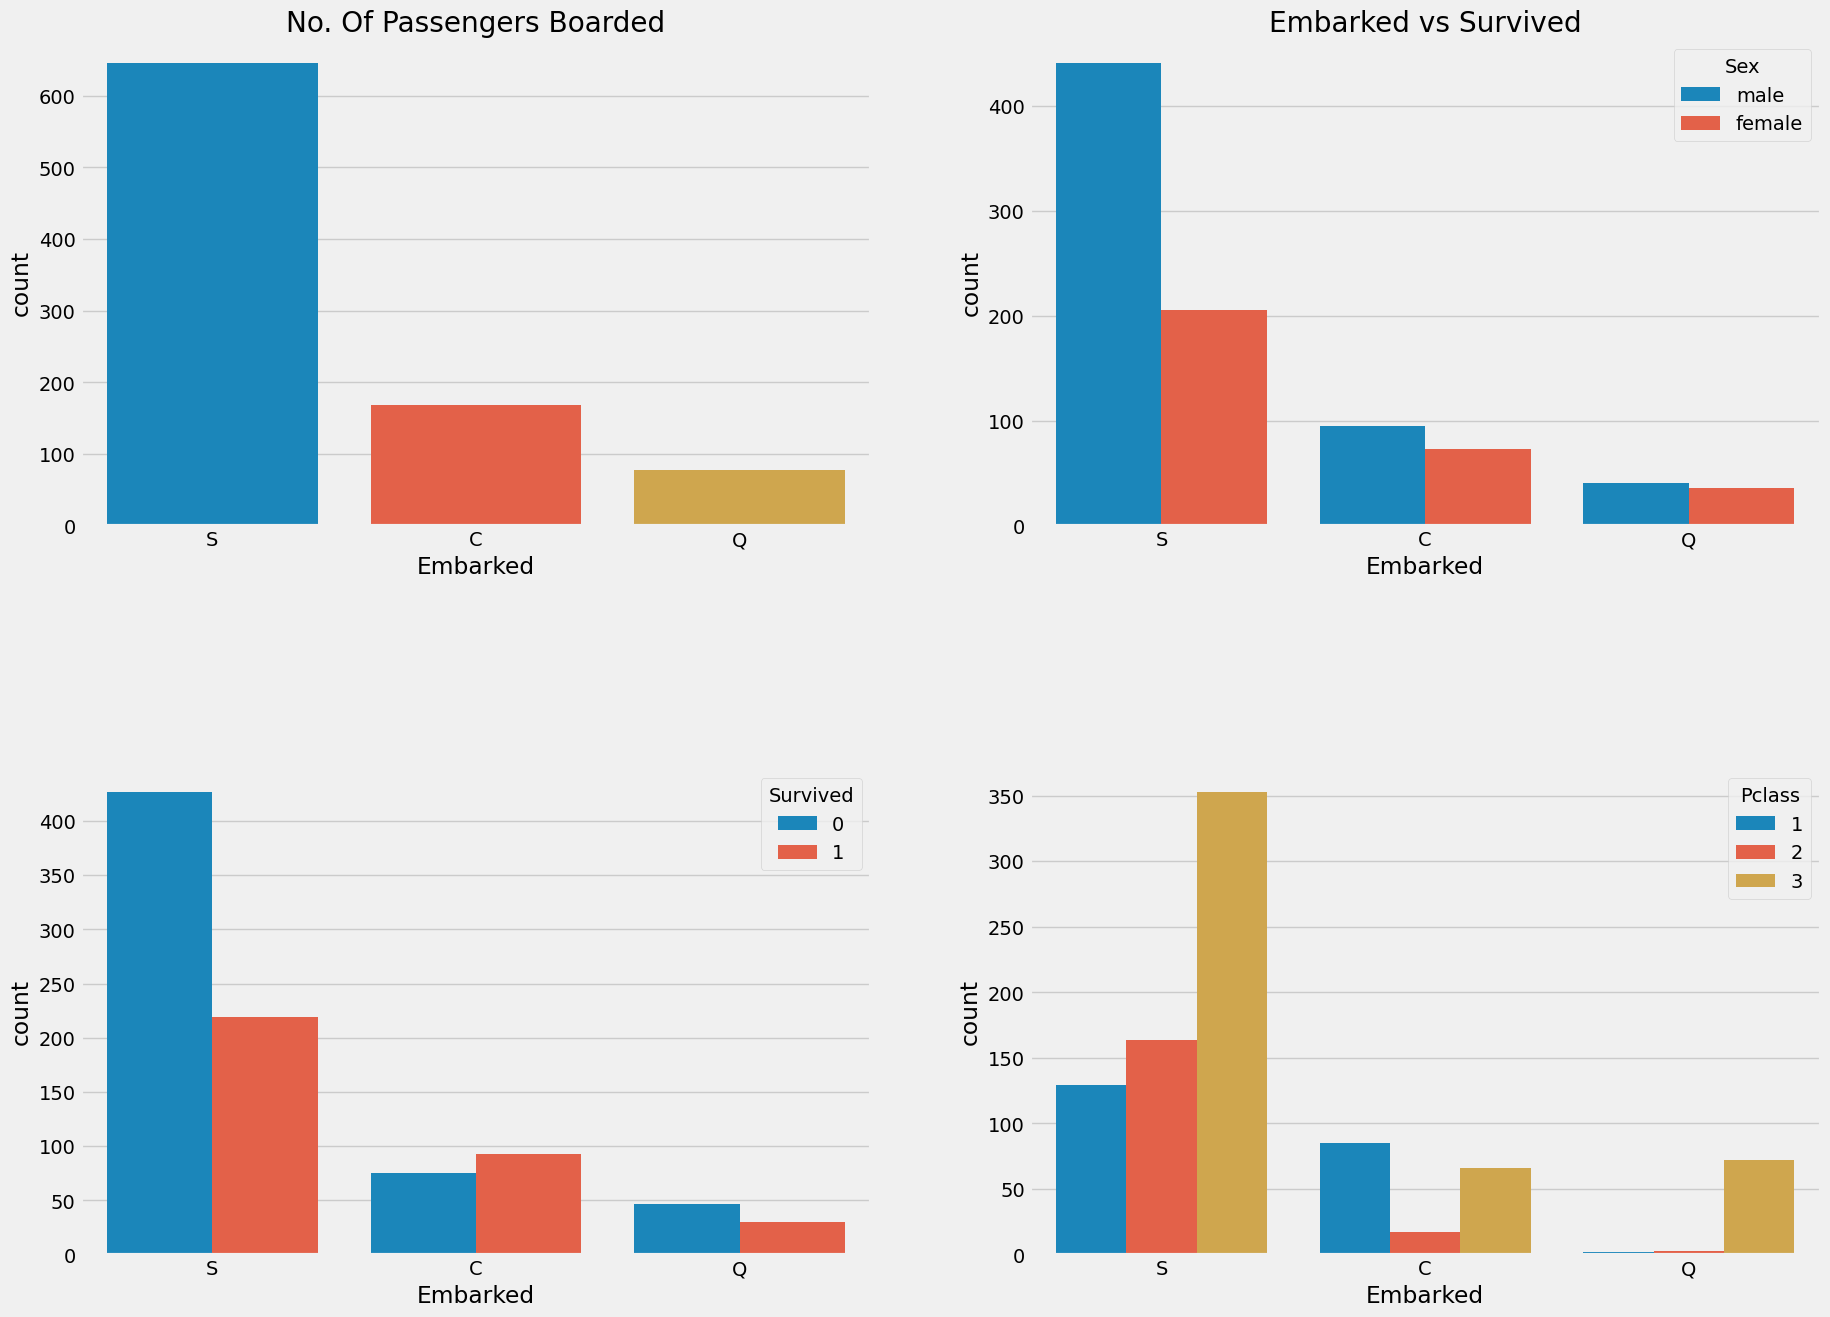

In [31]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(data=data, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarkd')
sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1,0])
ax[0,1].set_title('Embarked vs Survived')
sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1,1])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

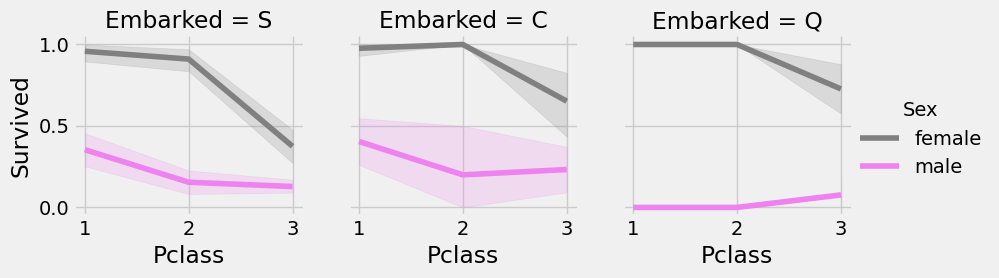

In [26]:
pal = {'male' : 'violet', 'female' : 'gray'} #색상 수동 변경

facet = sns.FacetGrid(data, col='Embarked',hue='Sex', aspect=1, palette=pal,
                     hue_order=['female', 'male'])
facet = facet.map(sns.lineplot, 'Pclass', 'Survived')
facet = facet.add_legend()
facet = facet.fig.subplots_adjust(wspace = 0.2)

In [27]:
data.Embarked.isnull().any()

True

In [28]:
data['Embarked'].fillna('S', inplace=True)

In [29]:
data.Embarked.isnull().any()

False

In [33]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


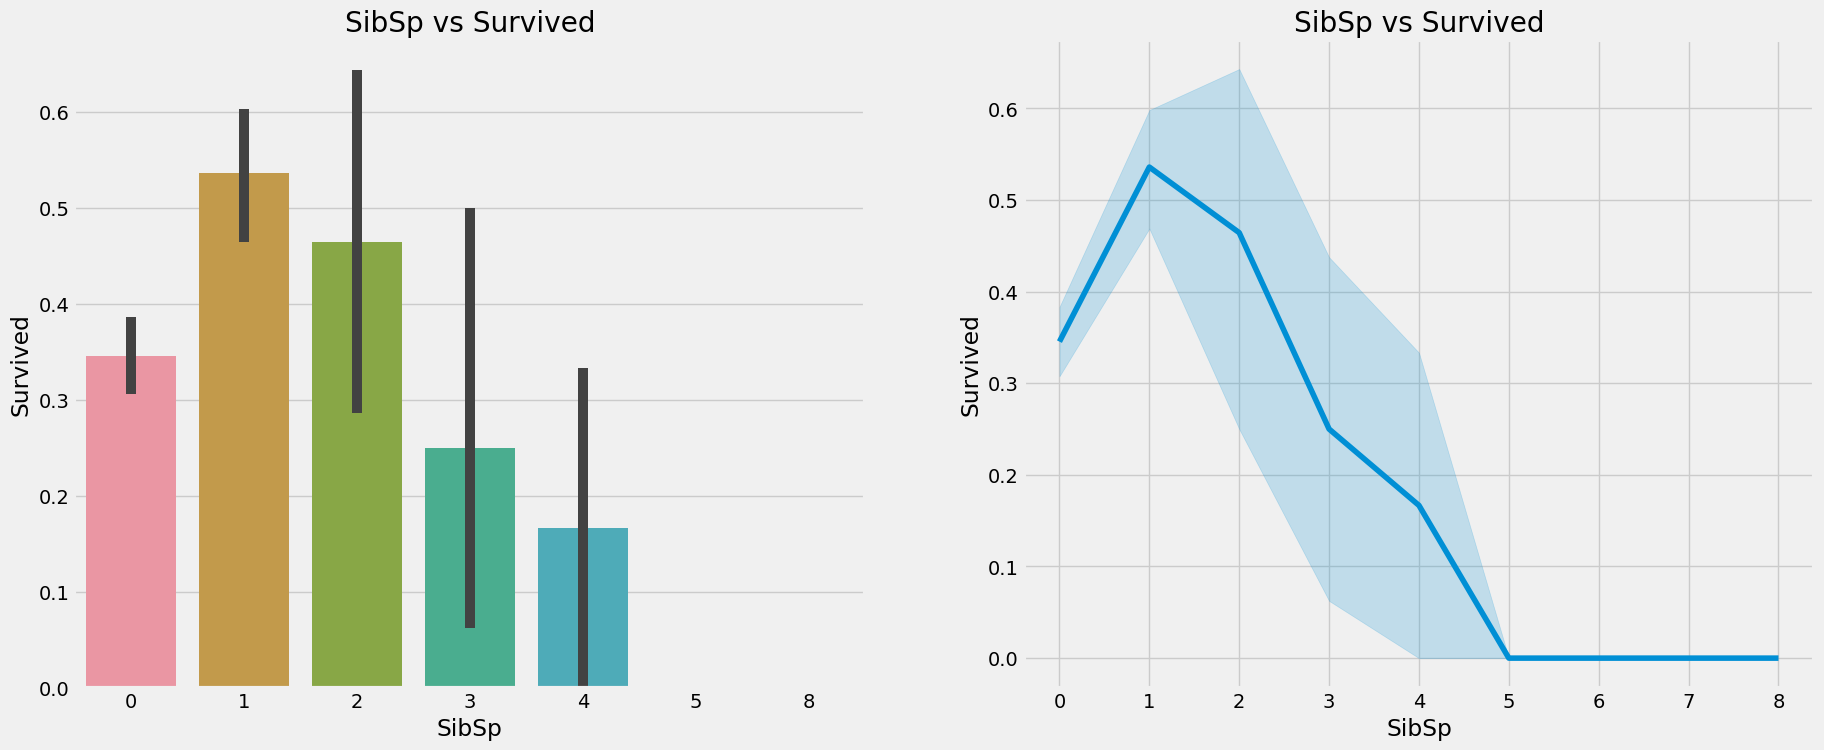

In [34]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.lineplot(data=data, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [35]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [36]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


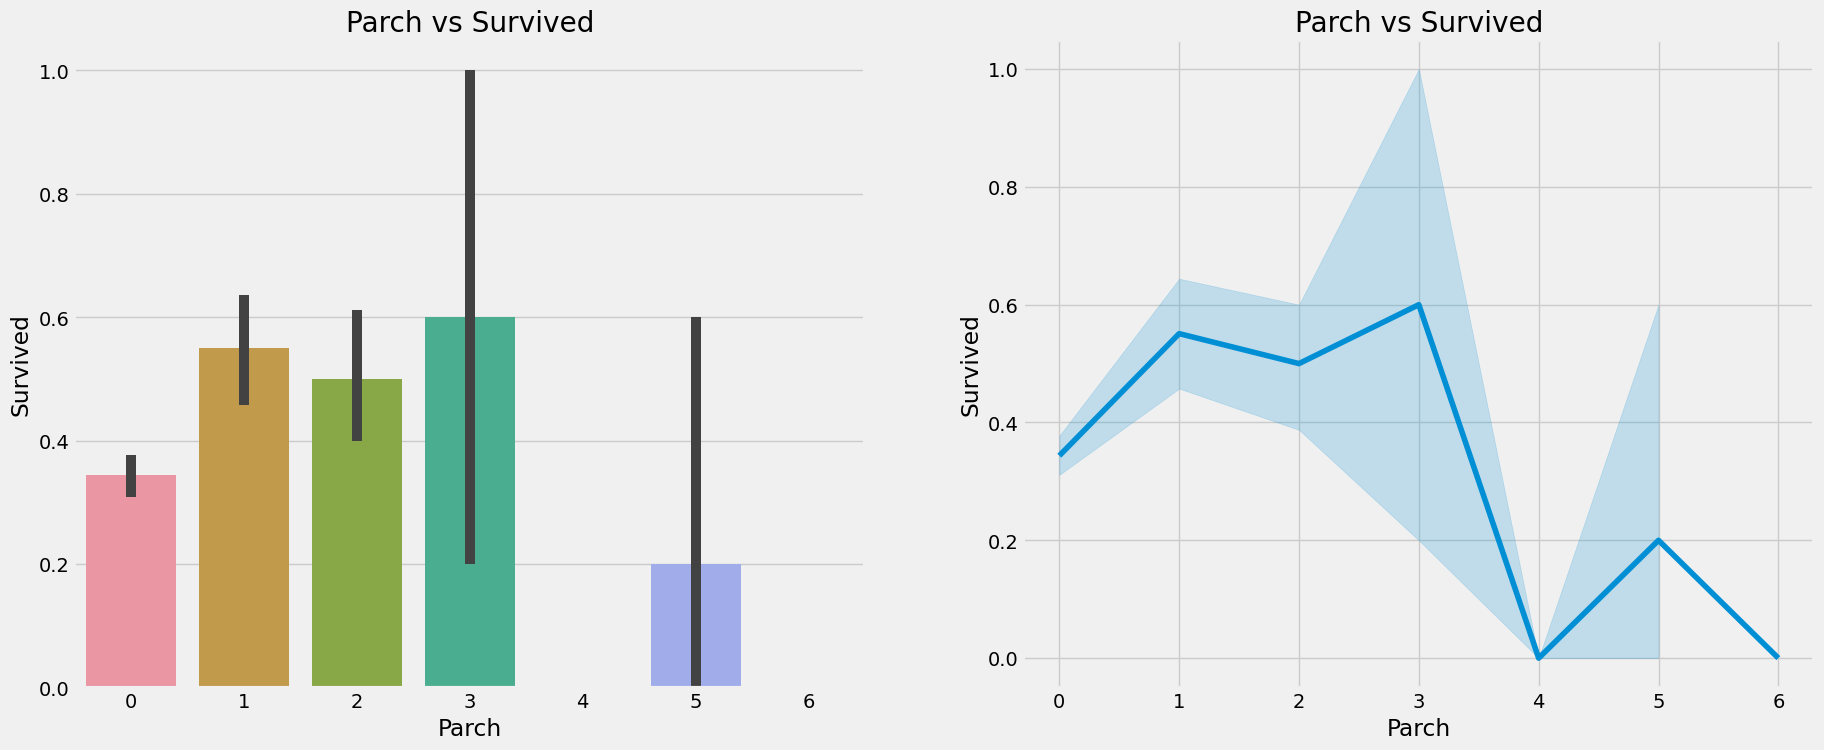

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.lineplot(data=data, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [43]:
print('Highest Fare : ',data.Fare.max())
print('Lowest Fare : ',data.Fare.min())
print('Average Fare : ',data.Fare.mean())

Highest Fare :  512.3292
Lowest Fare :  0.0
Average Fare :  32.204207968574636


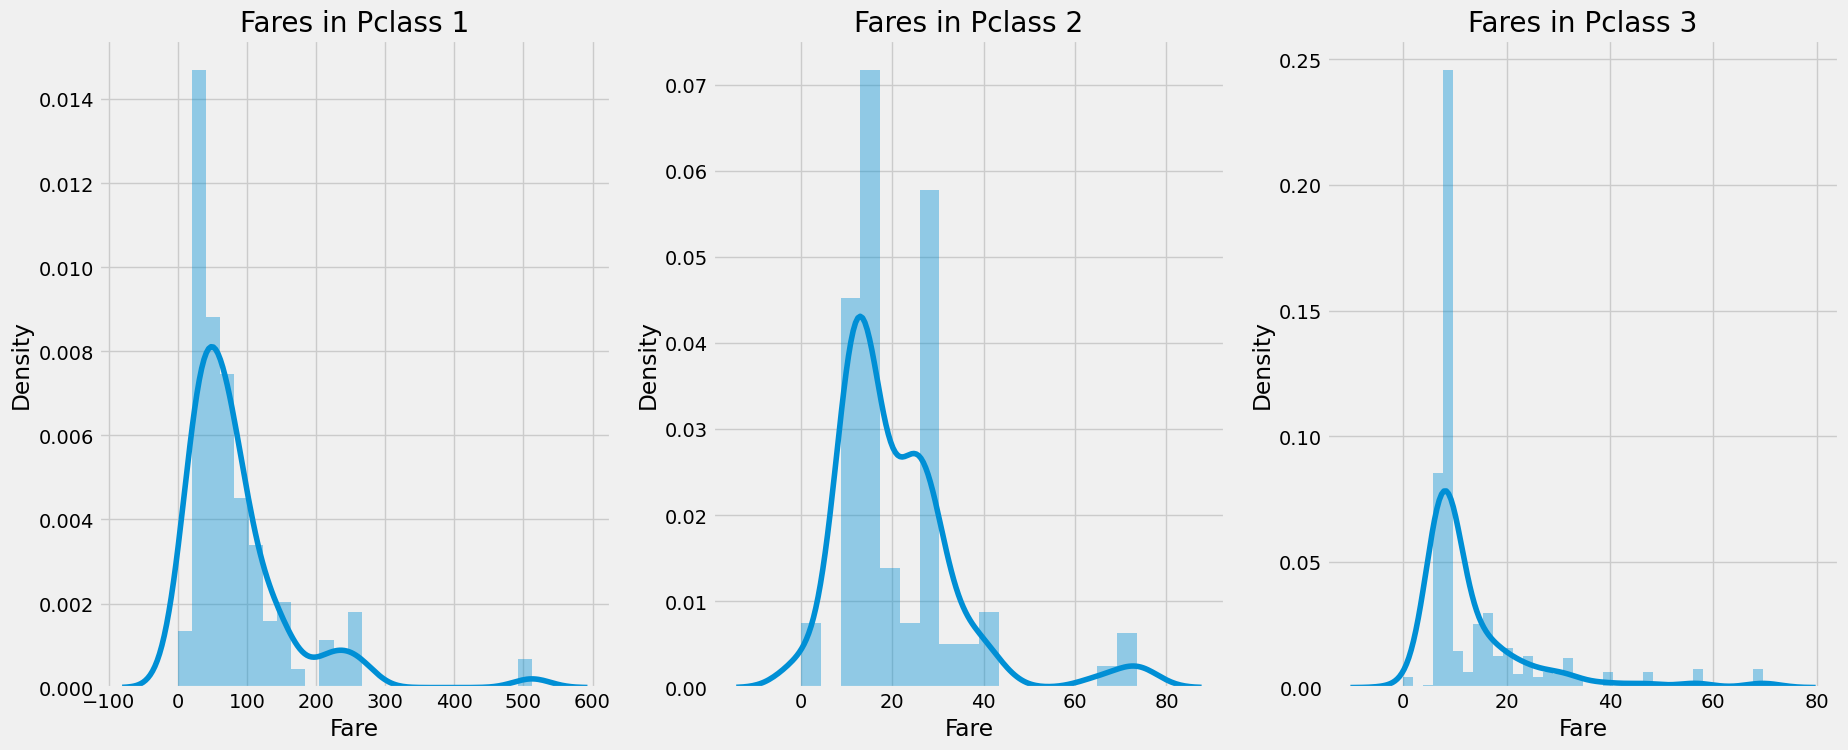

In [45]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

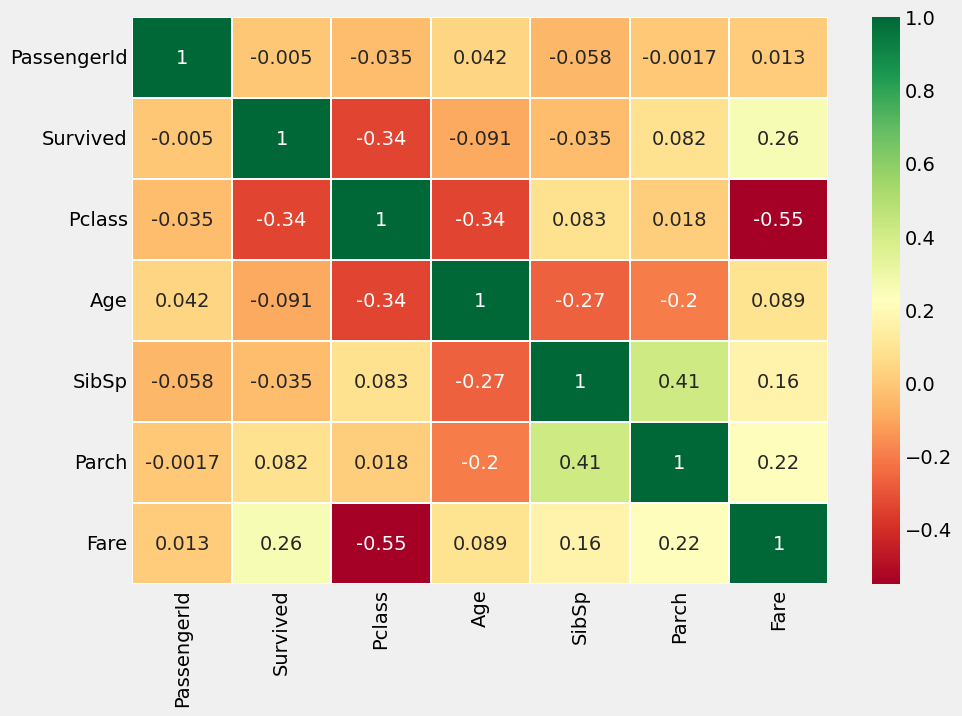

In [52]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #data.corr() --> Correlation matrix
fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()